In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8,6

# Everett's Source Radius Plot

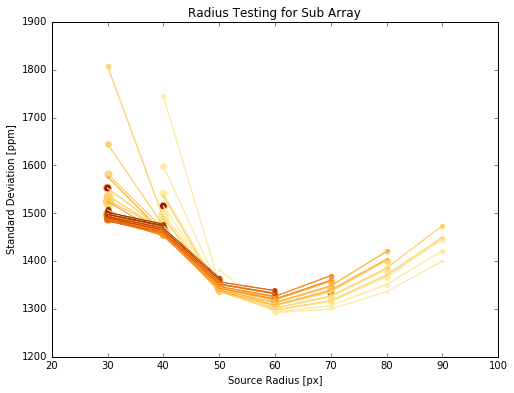

In [24]:
data = ascii.read('rt_full.csv')
uniqDSource = np.sort(list(set(data['rIn - r'])))
uniqDOut = np.sort(list(set(data['rOut - rIn'])))
plt.clf()
sizeArr = np.linspace(5,100,len(uniqDSource))
colArr = np.linspace(0.2,1,len(uniqDOut))
for plotpass in ['first','second']:
    for colval, dSource in zip(colArr,uniqDSource):
        for sizeVal, dOut in zip(sizeArr,uniqDOut):
            if plotpass == 'first':
                if (dOut == np.median(uniqDOut)): label='R$_{In}$ - R$_{S}$='+str(dSource)
                else: label=''
            else:
                if (dSource == np.median(uniqDSource)): label='R$_{Out}$ - R$_{In}$='+str(dOut)
                else: label=''
            pts = (data['rIn - r'] == dSource) & (data['rOut - rIn'] == dOut)
            plt.scatter(data['r_source'][pts],data['norm_stdev'][pts]*1e6,
                        alpha=0.7,color=plt.cm.YlOrBr(colval),s=sizeVal,
                        label=label)
            plt.plot(data['r_source'][pts],data['norm_stdev'][pts]*1e6,
                     color=plt.cm.YlOrBr(colval),label='')
plt.legend(loc='best', bbox_to_anchor = (1,1), ncol=2,fontsize=12)
plt.xlabel('Source Radius [px]')
plt.ylabel('Standard Deviation [ppm]')
plt.title('Radius Testing for Sub Array')
# plt.ylim(475,700)

In [11]:
plt.clf()

In [12]:
uniqDOut

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,
        100.,  110.])

## Test1 (SUB320)

In [6]:
a = ascii.read('rt_sub(fg).csv')
b = a['norm_stdev']
for i, c in enumerate(b):
    if (c<0):
        b[i] = np.nan
a

norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64
0.000500223598886,62.0,72.0,82.0,10.0,10.0
0.000500605100592,62.0,72.0,84.0,10.0,12.0
0.000500427035157,62.0,72.0,86.0,10.0,14.0
0.000500424874854,62.0,72.0,88.0,10.0,16.0
0.000500098856382,62.0,72.0,90.0,10.0,18.0
0.00050017792605,62.0,72.0,92.0,10.0,20.0
0.000500195557328,62.0,72.0,94.0,10.0,22.0
0.000500275260029,62.0,72.0,96.0,10.0,24.0
0.000500162611808,62.0,72.0,98.0,10.0,26.0


In [7]:
print "least stdev:", np.nanmin(b)
print "best r_src:", a['r_source'][np.nanargmin(b)]
print "best r_in:", a['r_in'][np.nanargmin(b)]
print "best r_out:", a['r_out'][np.nanargmin(b)]

least stdev: 0.000496563456095
best r_src: 72.0
best r_in: 80.0
best r_out: 82.0


(0.0014, 0.0024)

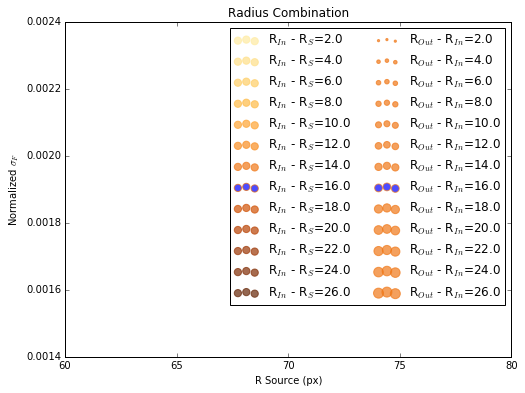

In [8]:
data = a
uniqDIn = np.sort(list(set(data['rIn - r'])))
uniqDOut = np.sort(list(set(data['rOut - rIn'])))
# plt.clf()
sizeArr = np.linspace(5,100,len(uniqDIn))
colArr = np.linspace(0.2,1,len(uniqDOut))
for plotpass in ['first','second']:
    for colval, dIn in zip(colArr,uniqDIn):
        for sizeVal, dOut in zip(sizeArr,uniqDOut):
            if plotpass == 'first':
                if (dOut == np.median(uniqDOut)): label='R$_{In}$ - R$_{S}$='+str(dIn)
                else: label=''
            else:
                if (dIn == np.median(uniqDIn)): label='R$_{Out}$ - R$_{In}$='+str(dOut)
                else: label=''
            pts = (data['rIn - r'] == dIn) & (data['rOut - rIn'] == dOut)
            plt.scatter(data['r_source'][pts],data['norm_stdev'][pts],
                        alpha=0.7,color=plt.cm.YlOrBr(colval),s=sizeVal,
                        label=label)
            plt.plot(data['r_source'][pts],data['norm_stdev'][pts],
                     color=plt.cm.YlOrBr(colval),label='')
plt.legend(loc='best', bbox_to_anchor = (1,1), ncol=2,fontsize=12)
plt.title('Radius Combination')
plt.xlabel('R Source (px)')
plt.ylabel('Normalized $\sigma_F$')
plt.ylim(0.0014,0.0024)

## Test2 (SUB640)

In [42]:
a = ascii.read('rt_sub640.csv')
b = a['norm_stdev']
for i, c in enumerate(b):
    if (c<0):
        b[i] = np.nan
a

norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64
nan,20.0,40.0,60.0,20.0,20.0
0.0084899918031,20.0,40.0,70.0,20.0,30.0
0.00371795391316,20.0,40.0,80.0,20.0,40.0
0.00346749791557,20.0,40.0,90.0,20.0,50.0
0.00338775107793,20.0,40.0,100.0,20.0,60.0
0.00335356420878,20.0,40.0,110.0,20.0,70.0
0.00333501191499,20.0,40.0,120.0,20.0,80.0
0.00332612708297,20.0,40.0,130.0,20.0,90.0
0.00331981850449,20.0,40.0,140.0,20.0,100.0


In [43]:
print "least stdev:", np.nanmin(b)
print "best r_src:", a['r_source'][np.nanargmin(b)]
print "best r_in:", a['r_in'][np.nanargmin(b)]
print "best r_out:", a['r_out'][np.nanargmin(b)]

least stdev: 0.00310109051777
best r_src: 40.0
best r_in: 50.0
best r_out: 60.0


(0.0031, 0.0038)

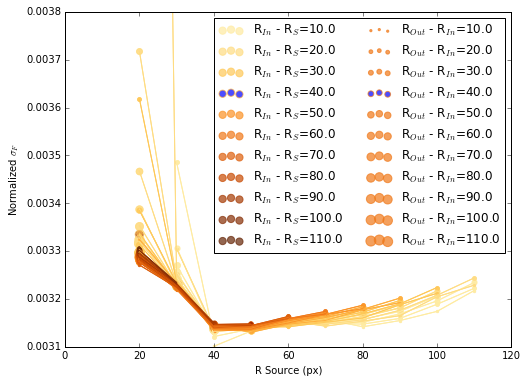

In [27]:
data2 = a
uniqDIn = np.sort(list(set(data2['rIn - r'])))
uniqDOut = np.sort(list(set(data2['rOut - rIn'])))
# plt.clf()
sizeArr = np.linspace(5,100,len(uniqDIn))
colArr = np.linspace(0.2,1,len(uniqDOut))
for plotpass in ['first','second']:
    for colval, dIn in zip(colArr,uniqDIn):
        for sizeVal, dOut in zip(sizeArr,uniqDOut):
            if plotpass == 'first':
                if (dOut == np.median(uniqDOut)): label='R$_{In}$ - R$_{S}$='+str(dIn)
                else: label=''
            else:
                if (dIn == np.median(uniqDIn)): label='R$_{Out}$ - R$_{In}$='+str(dOut)
                else: label=''
            pts = (data2['rIn - r'] == dIn) & (data2['rOut - rIn'] == dOut)
            plt.scatter(data2['r_source'][pts],data2['norm_stdev'][pts],
                        alpha=0.7,color=plt.cm.YlOrBr(colval),s=sizeVal,
                        label=label)
            plt.plot(data2['r_source'][pts],data2['norm_stdev'][pts],
                     color=plt.cm.YlOrBr(colval),label='')
plt.legend(loc='best', bbox_to_anchor = (1,1), ncol=2,fontsize=12)
plt.xlabel('R Source (px)')
plt.ylabel('Normalized $\sigma_F$')
plt.ylim(0.0031,0.0038)

## Test3 (Full Array)

In [44]:
a = ascii.read('rt_full.csv')
b = a['norm_stdev']
for i, c in enumerate(b):
    if (c<0):
        b[i] = np.nan
a

norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64
nan,20.0,40.0,60.0,20.0,20.0
0.0294478131673,20.0,40.0,70.0,20.0,30.0
0.00768577694344,20.0,40.0,80.0,20.0,40.0
0.00611534891864,20.0,40.0,90.0,20.0,50.0
0.00561628709223,20.0,40.0,100.0,20.0,60.0
0.00539066081886,20.0,40.0,110.0,20.0,70.0
0.00528184104324,20.0,40.0,120.0,20.0,80.0
0.00522798077804,20.0,40.0,130.0,20.0,90.0
0.00519214383353,20.0,40.0,140.0,20.0,100.0


In [45]:
print "least stdev:", np.nanmin(b)
print "best r_src:", a['r_source'][np.nanargmin(b)]
print "best r_in:", a['r_in'][np.nanargmin(b)]
print "best r_out:", a['r_out'][np.nanargmin(b)]

least stdev: 0.00268152173084
best r_src: 50.0
best r_in: 60.0
best r_out: 70.0


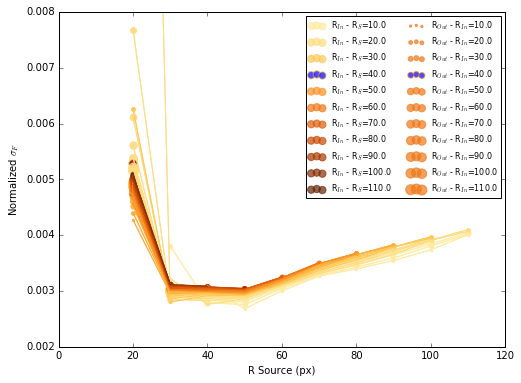

In [35]:
data3 = a
uniqDIn = np.sort(list(set(data3['rIn - r'])))
uniqDOut = np.sort(list(set(data3['rOut - rIn'])))
# plt.clf()
sizeArr = np.linspace(5,100,len(uniqDIn))
colArr = np.linspace(0.2,1,len(uniqDOut))
for plotpass in ['first','second']:
    for colval, dIn in zip(colArr,uniqDIn):
        for sizeVal, dOut in zip(sizeArr,uniqDOut):
            if plotpass == 'first':
                if (dOut == np.median(uniqDOut)): label='R$_{In}$ - R$_{S}$='+str(dIn)
                else: label=''
            else:
                if (dIn == np.median(uniqDIn)): label='R$_{Out}$ - R$_{In}$='+str(dOut)
                else: label=''
            pts = (data3['rIn - r'] == dIn) & (data3['rOut - rIn'] == dOut)
            plt.scatter(data3['r_source'][pts],data3['norm_stdev'][pts],
                        alpha=0.7,color=plt.cm.YlOrBr(colval),s=sizeVal,
                        label=label)
            plt.plot(data3['r_source'][pts],data3['norm_stdev'][pts],
                     color=plt.cm.YlOrBr(colval),label='')
plt.legend(loc='best',ncol=2,fontsize=8)
plt.xlabel('R Source (px)')
plt.ylabel('Normalized $\sigma_F$')
plt.ylim(0.002,0.008)
plt.savefig('full_array_rt.png')

## Test4 (Focus)

In [46]:
a = ascii.read('rt_clr.csv')
b = a['norm_stdev']
for i, c in enumerate(b):
    if (c<0):
        b[i] = np.nan
a

norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64
8.56064427251,1.0,3.0,5.0,2.0,2.0
0.175947135941,1.0,3.0,6.0,2.0,3.0
0.100584248733,1.0,3.0,7.0,2.0,4.0
0.0759428222097,1.0,3.0,8.0,2.0,5.0
0.064595117063,1.0,3.0,9.0,2.0,6.0
0.0581631170671,1.0,3.0,10.0,2.0,7.0
0.0539938744114,1.0,3.0,11.0,2.0,8.0
0.0510989533454,1.0,3.0,12.0,2.0,9.0
0.0490188810733,1.0,3.0,13.0,2.0,10.0


In [47]:
print "least stdev:", np.nanmin(b)
print "best r_src:", a['r_source'][np.nanargmin(b)]
print "best r_in:", a['r_in'][np.nanargmin(b)]
print "best r_out:", a['r_out'][np.nanargmin(b)]

least stdev: 0.00346747646317
best r_src: 6.0
best r_in: 7.0
best r_out: 8.0


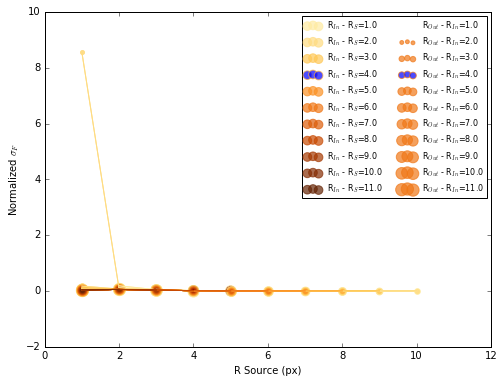

In [48]:
data4 = ascii.read('rt_clr.csv')
uniqDIn = np.sort(list(set(data4['rIn - r'])))
uniqDOut = np.sort(list(set(data4['rOut - rIn'])))
plt.clf()
sizeArr = np.linspace(0,150,len(uniqDIn))
colArr = np.linspace(0.2,1,len(uniqDOut))
for plotpass in ['first','second']:
    for colval, dIn in zip(colArr,uniqDIn):
        for sizeVal, dOut in zip(sizeArr,uniqDOut):
            if plotpass == 'first':
#                 label='R$_{In}$ - R$_{S}$='+str(dIn)
                if (dOut == np.round(np.median(uniqDOut))): 
                    label='R$_{In}$ - R$_{S}$='+str(dIn)
                else: label=''
            else:
                if (dIn == np.round(np.median(uniqDIn))): 
                    label='R$_{Out}$ - R$_{In}$='+str(dOut)
                else: label=''
            pts = (data4['rIn - r'] == dIn) & (data4['rOut - rIn'] == dOut)
            plt.scatter(data4['r_source'][pts],data4['norm_stdev'][pts],
                        alpha=0.7,color=plt.cm.YlOrBr(colval),s=sizeVal,
                        label=label)
            plt.plot(data4['r_source'][pts],data4['norm_stdev'][pts],
                     color=plt.cm.YlOrBr(colval),label='')
plt.legend(loc='best', ncol=2,fontsize=8)
plt.xlabel('R Source (px)')
plt.ylabel('Normalized $\sigma_F$')
plt.savefig('in_focus rad_rest.png')
# plt.ylim(0.0024,0.0036)

In [6]:
np.median(uniqDOut)
uniqDOut

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.])